# Lets import the Data

In [161]:
data_file = "../datasets/countries5.csv"

In [162]:
import pandas as pd
import numpy as np

countries = pd.read_csv(data_file)
countries

,Country,PDI,IDV,MAS,UAI,IVR
0,Argentina,40,47,48,75,62.0
1,Australia,26,98,53,41,71.0
2,Austria,0,57,70,59,63.0
3,Bangladesh,74,16,47,50,20.0
4,Belgium,58,81,46,82,57.0
...,...,...,...,...,...,...
78,United States,31,100,54,36,68.0
79,Uruguay,53,35,31,88,53.0
80,Venezuela,75,7,64,65,100.0
81,Vietnam,63,16,33,21,35.0


In [163]:
countries.head()
for var in countries:
    print(var)

Country
PDI
IDV
MAS
UAI
IVR


In [164]:
# Clean data, notably fill in missing values, etc
# Lets try method 1 for now, and if we want we'll try 
# Other approaches later

def method1(data):
    for var in data:
        if var != "Country":
            mean_v = np.mean(data[var])
            print("Filling", var, "with", mean_v)
            data[var] = data[var].fillna(mean_v)

    return data

def method2(data):
    return

In [165]:
countries = method1(countries)


Filling PDI with 54.19277108433735
Filling IDV with 41.12048192771084
Filling MAS with 41.18072289156626
Filling UAI with 55.72289156626506
Filling IVR with 47.24285714285714


In [166]:
var_lst = countries.columns
var_lst = var_lst.drop("Country")

# K-Means

We'll follow the tutorial laid out in the article linked

In [167]:
# Import packages

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# The article uses MinMaxScaler, but our data is already at a 0-100 scale for every variable,
# So we won't do any more pre-processing. 
dat = countries[var_lst]
sse = []
k_to = 30
for i in range(1,k_to):
    meaner = KMeans(n_clusters = i)
    meaner = meaner.fit(dat)
    sse.append(meaner.inertia_)
    

C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


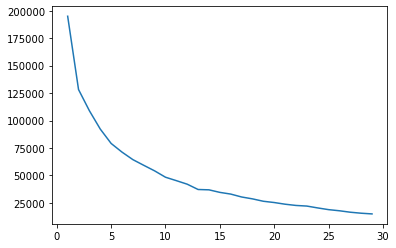

In [168]:
# Now lets see which k is best!

plt.plot(range(1, k_to), sse)

This isn't the most obvious chart ever, but it seems like we get a good deal of diminishing returns after about k = 10, so we'll use 10 as our optimal k. I think I could be convinced that anything in the 5-10 range is an acceptable k, but I'm going with 10 for the time being

In [169]:
def print_clusters(cluster, labels):
    
    for val in range(np.max(cluster) + 1):
        cur_cluster = []
        for i in range(len(cluster)):
            if cluster[i] == val:
                cur_cluster.append(labels[i])
        
        print("Cluster", val,":", cur_cluster)

In [172]:
meaner = KMeans(n_clusters = 10)
meaner.fit(dat)
meaner.labels_


array([5, 9, 3, 6, 5, 4, 6, 9, 1, 0, 8, 1, 6, 5, 2, 4, 6, 8, 4, 7, 2, 5,
       3, 8, 1, 1, 0, 5, 0, 4, 4, 6, 9, 3, 5, 0, 5, 4, 4, 7, 4, 4, 7, 0,
       5, 8, 6, 2, 9, 8, 2, 6, 1, 1, 0, 5, 1, 6, 6, 4, 6, 4, 0, 0, 1, 3,
       1, 5, 1, 2, 3, 4, 4, 4, 8, 1, 4, 9, 9, 1, 8, 0, 4])

In [173]:
print_clusters(meaner.labels_, countries["Country"])

Cluster 0 : ['China', 'Hong Kong', 'India', 'Jamaica', 'Malaysia', 'Philippines', 'Singapore', 'Slovak Rep', 'Vietnam']
Cluster 1 : ['Chile', 'Costa Rica', 'Greece', 'Guatemala', 'Panama', 'Peru', 'Portugal', 'Slovenia', 'South Korea', 'Suriname', 'Turkey', 'Uruguay']
Cluster 2 : ['Denmark', 'Finland', 'Netherlands', 'Norway', 'Sweden']
Cluster 3 : ['Austria', 'Germany', 'Israel', 'South Africa', 'Switzerland']
Cluster 4 : ['Brazil', 'Ecuador', 'Ethiopia', 'Indonesia', 'Iran', 'Kenya', 'Kuwait', 'Lebanon', 'Libya', 'Saudi Arabia', 'Sierra Leone', 'Taiwan', 'Tanzania', 'Thailand', 'United Arab Emirates', 'Zambia']
Cluster 5 : ['Argentina', 'Belgium', 'Czech Republic', 'France', 'Hungary', 'Italy', 'Japan', 'Malta', 'Poland', 'Spain']
Cluster 6 : ['Bangladesh', 'Bulgaria', 'Croatia', 'Egypt', 'Iraq', 'Morocco', 'Pakistan', 'Romania', 'Russia', 'Serbia']
Cluster 7 : ['Estonia', 'Latvia', 'Lithuania']
Cluster 8 : ['Colombia', 'El Salvador', 'Ghana', 'Mexico', 'Nigeria', 'Trinidad and Tobag

These clusters look reasonable. Cluster 3 ('Estonia', 'Latvia', 'Lithuania') certainly makes sense, as does cluster 2 ('Denmark', 'Finland', 'Netherlands', 'Norway', 'Sweden'). Some are a little more strange, like China and Jamaica being in the same cluster, but clustering is weird--I also don't know much about Jamaica, so its probably my own inexperience. I think cluster 9 makes sense too, those countries are all pretty similiar

# Bisecting K-Means (bonus) 

Theres a lot to review here, so I'll revist this later. 

# Hierarchal Clustering 

Lets get some of the distances from the example lab

In [174]:
from math import sqrt

def manhattan(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        res+=abs(v1[i]-v2[i])

    return res


def euclidean(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))
    for i in range(dimensions):
        res+=pow(abs(v1[i]-v2[i]),2)

    return sqrt(float(res))


def cosine(v1,v2):
    dotproduct=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        dotproduct+=v1[i]*v2[i]

    v1len=0
    v2len=0
    for i in range (dimensions):
        v1len+=v1[i]*v1[i]
        v2len+=v2[i]*v2[i]

    v1len=sqrt(v1len)
    v2len=sqrt(v2len)
    
    # we need distance here - 
    # we convert cosine similarity into distance
    return 1.0-(float(dotproduct)/(v1len*v2len))
  

def pearson(v1,v2):
    # Simple sums
    sum1=sum(v1)
    sum2=sum(v2)
  
    # Sums of the squares
    sum1Sq=sum([pow(v,2) for v in v1])
    sum2Sq=sum([pow(v,2) for v in v2])
  
    # Sum of the products
    pSum=sum([v1[i]*v2[i] for i in range(min(len(v1),len(v2)))])
  
    # Calculate r (Pearson score)
    numerator=pSum-(sum1*sum2/len(v1))
    denominator=sqrt((sum1Sq-pow(sum1,2)/len(v1))*(sum2Sq-pow(sum2,2)/len(v1)))
    if denominator==0: return 1.0
    
    # we need distance here - 
    # we convert pearson correlation into distance
    return 1.0-numerator/denominator


def tanimoto(v1,v2):
    c1,c2,shared=0,0,0

    for i in range(len(v1)):
        if v1[i]!=0 or v2[i]!= 0:
            if v1[i]!=0: c1+=1 # in v1
            if v2[i]!=0: c2+=1 # in v2
            if v1[i]!=0 and v2[i]!=0: shared+=1 # in both
    
    # we need distance here - 
    # we convert tanimoto overlap into distance
    return 1.0-(float(shared)/(c1+c2-shared))

In [175]:
# draw hierarchical clusters
from PIL import Image,ImageDraw

def getheight(clust):
    # Is this an endpoint? Then the height is just 1
    if clust.left==None and clust.right==None: return 1

    # Otherwise the height is the same of the heights of
    # each branch
    return getheight(clust.left)+getheight(clust.right)


def getdepth(clust):
    # The distance of an endpoint is 0.0
    if clust.left==None and clust.right==None: return 0

    # The distance of a branch is the greater of its two sides
    # plus its own distance
    return max(getdepth(clust.left),getdepth(clust.right))+clust.distance


def drawdendrogram(clust,labels,jpeg='clusters.jpg'):
    # height and width
    h=getheight(clust)*20
    w=1200
    depth=getdepth(clust)

    # width is fixed, so scale distances accordingly
    scaling=float(w-150)/depth

    # Create a new image with a white background
    img=Image.new('RGB',(w,h),(255,255,255))
    draw=ImageDraw.Draw(img)

    draw.line((0,h/2,10,h/2),fill=(255,0,0))

    # Draw the first node
    drawnode(draw,clust,10,(h/2),scaling,labels)
    img.save(jpeg,'JPEG')


def drawnode(draw,clust,x,y,scaling,labels):
    if clust.id<0:
        h1=getheight(clust.left)*20
        h2=getheight(clust.right)*20
        top=y-(h1+h2)/2
        bottom=y+(h1+h2)/2
        # Line length
        ll=clust.distance*scaling
        # Vertical line from this cluster to children
        draw.line((x,top+h1/2,x,bottom-h2/2),fill=(255,0,0))

        # Horizontal line to left item
        draw.line((x,top+h1/2,x+ll,top+h1/2),fill=(255,0,0))

        # Horizontal line to right item
        draw.line((x,bottom-h2/2,x+ll,bottom-h2/2),fill=(255,0,0))

        # Call the function to draw the left and right nodes
        drawnode(draw,clust.left,x+ll,top+h1/2,scaling,labels)
        drawnode(draw,clust.right,x+ll,bottom-h2/2,scaling,labels)
    else:
        # If this is an endpoint, draw the item label
        draw.text((x+5,y-7),labels[clust.id],(0,0,0))

In [176]:
class BiClusterNode:
    def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
        self.left=left
        self.right=right
        self.vec=vec
        self.id=id
        self.distance=distance
        
def hcluster(rows,distance=euclidean):
    distances={}
    currentclustid=-1

    # Clusters are initially just the rows
    clust=[BiClusterNode(rows[i],id=i) for i in range(len(rows))]

    while len(clust)>1:
        lowestpair=(0,1)
        closest=distance(clust[0].vec,clust[1].vec)

        # loop through every pair looking for the smallest distance
        for i in range(len(clust)):
            for j in range(i+1,len(clust)):
                # distances is the cache of distance calculations
                if (clust[i].id,clust[j].id) not in distances:
                    distances[(clust[i].id,clust[j].id)]=distance(clust[i].vec,clust[j].vec)

                d=distances[(clust[i].id,clust[j].id)]

                if d<closest:
                    closest=d
                    lowestpair=(i,j)

        # calculate the average of the two clusters
        mergevec=[
            (clust[lowestpair[0]].vec[i]+clust[lowestpair[1]].vec[i])/2.0
                    for i in range(len(clust[0].vec))]

        # create the new cluster
        newcluster=BiClusterNode(mergevec,left=clust[lowestpair[0]],
                             right=clust[lowestpair[1]],
                             distance=closest,id=currentclustid)

        # cluster ids that weren't in the original set are negative
        currentclustid-=1
        del clust[lowestpair[1]]
        del clust[lowestpair[0]]
        clust.append(newcluster)

    return clust[0]

In [177]:
numpy_ar = dat.to_numpy()
data_ar = []
for row in numpy_ar:
    data_ar.append(row)

In [178]:
data_ar[1]

array([26., 98., 53., 41., 71.])

In [179]:
country_ar = []
for val in countries["Country"].array:
    country_ar.append(val)

In [180]:
# Now we're ready to run it with our data!
# Use dat still, but we need to convert to an array (I think)
clustered=hcluster(numpy_ar,distance=euclidean)
drawdendrogram(clustered,country_ar,jpeg='docsclust_image.jpg')

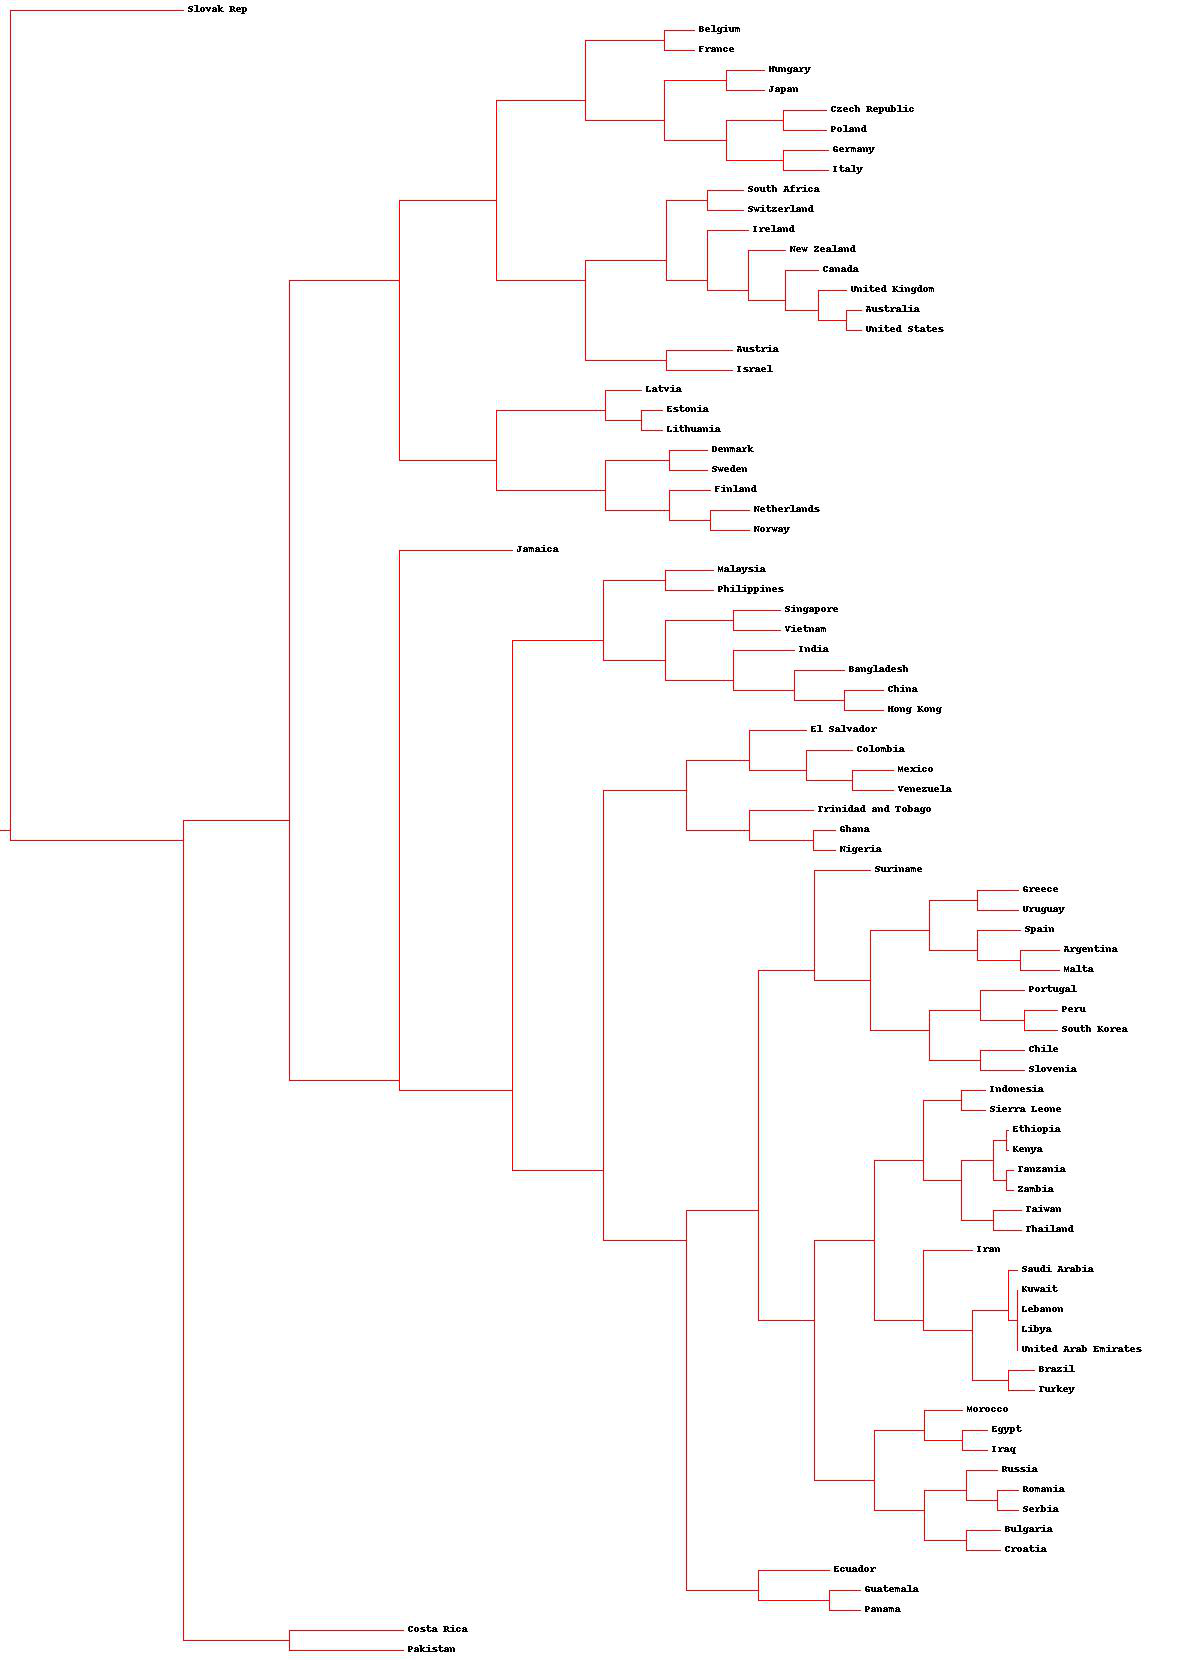

In [181]:
from PIL import Image               # to load images
from IPython.display import display # to display images

pil_im = Image.open('docsclust_image.jpg')
display(pil_im)

What a dendrogram! I'm not sure if I understand everything here (like Costa Rice and Pakistan being paired up),
but I'll trust the algorithm

# Exploring Clutsers

Lets go through our clusters shall we? We'll use the 10 clusters from Kmeans


In [182]:
def cluster_avg(cluster, data):
    ret = []
    for val in range(np.max(cluster) + 1):
        cur_cluster = []
        for i in range(len(cluster)):
            if cluster[i] == val:
                cur_cluster.append(data[i])
        # Now we can get averages
        tot = 0
        avg = []
        for i in range(len(cur_cluster[0])):
            tot = 0
            for row in cur_cluster:
                tot += row[i]
            tot /= len(cur_cluster)
            avg.append(tot)
        ret.append(avg)
    return ret
        

In [183]:
averages = cluster_avg(meaner.labels_, data_ar)

In [184]:
print_clusters(meaner.labels_, countries["Country"])

Cluster 0 : ['China', 'Hong Kong', 'India', 'Jamaica', 'Malaysia', 'Philippines', 'Singapore', 'Slovak Rep', 'Vietnam']
Cluster 1 : ['Chile', 'Costa Rica', 'Greece', 'Guatemala', 'Panama', 'Peru', 'Portugal', 'Slovenia', 'South Korea', 'Suriname', 'Turkey', 'Uruguay']
Cluster 2 : ['Denmark', 'Finland', 'Netherlands', 'Norway', 'Sweden']
Cluster 3 : ['Austria', 'Germany', 'Israel', 'South Africa', 'Switzerland']
Cluster 4 : ['Brazil', 'Ecuador', 'Ethiopia', 'Indonesia', 'Iran', 'Kenya', 'Kuwait', 'Lebanon', 'Libya', 'Saudi Arabia', 'Sierra Leone', 'Taiwan', 'Tanzania', 'Thailand', 'United Arab Emirates', 'Zambia']
Cluster 5 : ['Argentina', 'Belgium', 'Czech Republic', 'France', 'Hungary', 'Italy', 'Japan', 'Malta', 'Poland', 'Spain']
Cluster 6 : ['Bangladesh', 'Bulgaria', 'Croatia', 'Egypt', 'Iraq', 'Morocco', 'Pakistan', 'Romania', 'Russia', 'Serbia']
Cluster 7 : ['Estonia', 'Latvia', 'Lithuania']
Cluster 8 : ['Colombia', 'El Salvador', 'Ghana', 'Mexico', 'Nigeria', 'Trinidad and Tobag

# Lets name our clusters?

0: South East Asia and Outliers

1: Local Outliers (countries that are different than its neighbors). 

2: Scandinavians

3: Central Europe and two Others

4: The Single Leader States

5: Europe and Countries where Europeans move to 

6: South Amerian 

7: The Baltics

8: Hispanic Nations

9: The British Empire


In [205]:
# Prep for export:

def out_clusters(cluster, labels):
    for val in range(np.max(cluster) + 1):
        cur_cluster = []
        for i in range(len(cluster)):
            if cluster[i] == val:
                print("['", labels[i],"',", val,"],", sep = "")
        
        


In [206]:
out_clusters(meaner.labels_, countries["Country"])

['China',0],
['Hong Kong',0],
['India',0],
['Jamaica',0],
['Malaysia',0],
['Philippines',0],
['Singapore',0],
['Slovak Rep',0],
['Vietnam',0],
['Chile',1],
['Costa Rica',1],
['Greece',1],
['Guatemala',1],
['Panama',1],
['Peru',1],
['Portugal',1],
['Slovenia',1],
['South Korea',1],
['Suriname',1],
['Turkey',1],
['Uruguay',1],
['Denmark',2],
['Finland',2],
['Netherlands',2],
['Norway',2],
['Sweden',2],
['Austria',3],
['Germany',3],
['Israel',3],
['South Africa',3],
['Switzerland',3],
['Brazil',4],
['Ecuador',4],
['Ethiopia',4],
['Indonesia',4],
['Iran',4],
['Kenya',4],
['Kuwait',4],
['Lebanon',4],
['Libya',4],
['Saudi Arabia',4],
['Sierra Leone',4],
['Taiwan',4],
['Tanzania',4],
['Thailand',4],
['United Arab Emirates',4],
['Zambia',4],
['Argentina',5],
['Belgium',5],
['Czech Republic',5],
['France',5],
['Hungary',5],
['Italy',5],
['Japan',5],
['Malta',5],
['Poland',5],
['Spain',5],
['Bangladesh',6],
['Bulgaria',6],
['Croatia',6],
['Egypt',6],
['Iraq',6],
['Morocco',6],
['Pakistan',6],
['

# Vocab

I have a specific way I want to do the Vocab section here, we're going to draw the words based on how extreme each cluster is in one category. Ie, the further away from 50, the more likely an attribute from that class is to be picked. 

In [187]:
vocab = pd.read_csv("vocab.txt", header = None)
vocab['cat'] = vocab[0]

In [188]:
arr = []
for ele in vocab[1]:
    arr.append(ele.split(" "))
for para in arr:
    para.remove("")
print(arr)
vocab['words'] = pd.Series(arr)


[['respect', 'father', 'master', 'servant', 'brother', 'younger', 'older', 'wisdom', 'favor', 'protect', 'obey', 'orders', 'pleasing'], ['rights', 'complain', 'negotiate', 'fairness', 'task', 'necessity', 'codetermination', 'objectives', 'question', 'criticize'], ['self', 'friendship', 'contract', 'litigation', 'self-interest', 'self-respect', 'self-actualizing', 'individual', 'dignity', 'I', 'me', 'pleasure', 'adventure', 'guilt', 'privacy'], ['we', 'harmony', 'face', 'obligation', 'sacrifice', 'family', 'tradition', 'decency', 'honor', 'duty', 'loyalty', 'shame'], ['career', 'competition', 'fight', 'aggressive', 'success', 'winner', 'deserve', 'merit', 'excel', 'force', 'big', 'fast', 'tough', 'hard', 'quantity', 'total', 'power', 'action'], ['quality', 'caring', 'solidarity', 'modesty', 'compromise', 'help', 'love', 'grow', 'small', 'soft', 'slow', 'tender', 'touch'], ['structure', 'duty', 'truth', 'law', 'order', 'certain', 'pure', 'clear', 'secure', 'safe', 'predictable', 'tight']

In [189]:
vocab.drop(labels = list((0,1)), axis = 1)

,cat,words
0,pdi_high,"[respect, father, master, servant, brother, yo..."
1,pdi_low,"[rights, complain, negotiate, fairness, task, ..."
2,idv_high,"[self, friendship, contract, litigation, self-..."
3,idv_low,"[we, harmony, face, obligation, sacrifice, fam..."
4,mvf_high,"[career, competition, fight, aggressive, succe..."
5,mvf_low,"[quality, caring, solidarity, modesty, comprom..."
6,unc_high,"[structure, duty, truth, law, order, certain, ..."
7,unc_low,"[maybe, creative, conflict, tolerant, experime..."
8,ivr_high,"[leisure, happy, loose, freedom, tolerance, ac..."
9,ivr_low,"[work, tight, moral, severe-punishments, rules..."


In [190]:
averages

[[73.33333333333333,
  29.333333333333332,
  54.0,
  22.88888888888889,
  35.804761904761904],
 [60.833333333333336,
  21.75,
  29.583333333333332,
  81.08333333333333,
  47.080952380952375],
 [20.2, 76.8, 8.0, 33.2, 65.6],
 [18.2, 65.0, 56.8, 54.0, 55.848571428571425],
 [64.125, 25.875, 39.4375, 51.0, 46.231249999999996],
 [49.0, 62.8, 53.5, 75.0, 43.8],
 [71.3, 29.3, 38.8, 66.4, 18.3],
 [33.0, 67.0, 13.0, 52.0, 15.0],
 [63.857142857142854,
  14.428571428571429,
  48.714285714285715,
  60.0,
  86.42857142857143],
 [23.5, 90.33333333333333, 53.166666666666664, 34.0, 69.33333333333333]]

In [191]:
def word_c(avgs, size = 500):
    labs = ["pdi_", "idv_", "mvf_", "unc_", "ivr_"]
    tot = 0
    for i in range(len(avgs)):
        if avgs[i] > 50:
            tot += avgs[i] - 50
        else:
            tot += 50 - avgs[i]
    # Now draw a random number between 0,1

    word_cloud = []
    # So lets figure out which word to take. 
    for i in range(size):
        r_num = np.random.random()*tot # Scale up by total
        # now figure out which bucket this corresponds too
        index = -1
        while r_num > 0:
            index+=1
            if avgs[index] > 50:
                r_num -= avgs[index] - 50
            else:
                r_num -= 50-avgs[index]
        # Now index is on the bucket we're selecting.
        suffix = ""
        if avgs[index] > 50:
            # We go to a positive value:
            suffix = "high"
        else:
            suffix = "low"
            
        word_cloud.append(vocab["words"][vocab["cat"] == labs[index]+suffix].values[0][np.random.randint(0, len(vocab["words"][vocab["cat"] == labs[index]+suffix].values[0]))])
    return word_cloud

In [192]:
word_clouds = []

for clu in averages:
    word_clouds.append(word_c(clu, 1000))
    


In [204]:
# So we have the words for our word clouds!
#word_clouds[9]

# I've made the word clouds and stored them in git!

Wasn't sure if I could insert them here!